<a href="https://colab.research.google.com/github/shivamehta/mastek/blob/master/Shoplifting%20Detection%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Prerequisites**

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shivammehtaa","key":"ee5acf6160377f3431e32367b8e84bb9"}'}

In [ ]:
#!rm -rf '/content/try3'

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mateohervas/dcsass-dataset

 99% 1.34G/1.35G [00:12<00:00, 144MB/s]
100% 1.35G/1.35G [00:12<00:00, 113MB/s]


In [4]:
from zipfile import ZipFile
file_name= 'dcsass-dataset.zip'
with ZipFile (file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
import shutil
import os
path='/content/DCSASS Dataset'
arr = os.listdir(path)
deletefolder=[]
for i in range(len(arr)):
  source_dir=path+'/'+arr[i]
  deletefolder.append(source_dir)
  target_dir = '/content/DCSASS Dataset'
    
  file_names = os.listdir(source_dir)
    
  for file_name in file_names:
      shutil.move(os.path.join(source_dir, file_name), target_dir)


for i in range(len(deletefolder)):
  deletefolder[i]='\'%s\''% deletefolder[i]
  !rm -rf deletefolder[i]

In [6]:
!pip install -q imageio
!pip install -q opencv-python
!pip install -q git+https://github.com/tensorflow/docs

     |████████████████████████████████| 1.0MB 5.0MB/s 


In [7]:
!kaggle datasets download -d vasylcf/anomaly

100% 15.2G/15.2G [02:38<00:00, 132MB/s]
100% 15.2G/15.2G [02:38<00:00, 103MB/s]


In [8]:
from zipfile import ZipFile
file_name= '/content/anomaly.zip'
with ZipFile (file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [9]:
!kaggle datasets download -d alirakhmaev/ucf-crime-full

100% 24.4G/24.4G [04:19<00:00, 87.3MB/s]
100% 24.4G/24.4G [04:19<00:00, 101MB/s] 


In [ ]:
from zipfile import ZipFile
file_name= 'ucf-crime-full.zip'
with ZipFile (file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


###**Loading Videos from Path and convert videos into Frames**

In [10]:
folder_path=[
             '/content/Videos/Fighting'
             ,'/content/Videos/Normal'
                        
             ,'/content/Videos/Shoplifting'
             
             ]

In [20]:
folder_path=['/content/dcsass dataset/DCSASS Dataset/Abuse'
            ,'/content/dcsass dataset/DCSASS Dataset/Burglary'
            ,'/content/dcsass dataset/DCSASS Dataset/Explosion'
            ,'/content/dcsass dataset/DCSASS Dataset/Arrest'
            ,'/content/dcsass dataset/DCSASS Dataset/Arson'
            ,'/content/dcsass dataset/DCSASS Dataset/Shooting'
            ,'/content/dcsass dataset/DCSASS Dataset/Vandalism'
             
             ]

In [11]:
Paths=[]
import os
def tree_printer(root):
    for root, dirs, files in os.walk(root):
        for f in files:
          if f.endswith(".mp4"):
            Paths.append(os.path.join(root, f))
for i in range(len(folder_path)):
  tree_printer(folder_path[i])                

In [12]:
len(Paths)

420

In [ ]:
import cv2
for i in range(len(Paths)):
    Path_name=Paths[i]
    vidcap = cv2.VideoCapture(Path_name)
    def getFrame(sec):
        vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
        hasFrames,image = vidcap.read()
        if hasFrames:
            cv2.imwrite(Path_name+''+str(count)+".jpg",image)     # save frame as JPG file
        return hasFrames
    sec = 0
    frameRate = 9.0 #//it will capture image in each 0.5 second
    count=1
    success = getFrame(sec)
    while success:
      if count<10:
        count = count + 1
        sec = sec + frameRate
        sec = round(sec, 2)
        success = getFrame(sec)
        print('Success')
      else:
        break  

In [14]:
dc_image_path=[]
ana_image_path=[]

In [24]:
import os

def getimagepath(root):
    for root, dirs, files in os.walk(root):
        for f in files:
            if f.endswith(".jpg"): 
                dc_image_path.append(os.path.join(root, f)) 
for i in range(len(folder_path)):
  getimagepath(folder_path[i])

In [25]:
len(ana_image_path)

2860

In [26]:
len(dc_image_path)

7104

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import load_img
import cv2
from sklearn.model_selection import train_test_split

In [17]:
from absl import logging

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow_docs.vis import embed

logging.set_verbosity(logging.ERROR)

# Some modules to help with reading the UCF101 dataset.
import random
import re
import os
import tempfile
import ssl
import cv2
import numpy as np
import pandas as pd
# Some modules to display an animation using imageio.
import imageio
from IPython import display

from urllib import request  # requires python3

In [18]:
data=[]
lables=[]
img_array=[]

In [27]:

for imagepath in dc_image_path:
    # extract the class label from the filename
    img=load_img(imagepath)
    img_arr = cv2.imread(imagepath)
    img_arr = cv2.resize(img_arr,(320,240))
    label = imagepath.split(os.path.sep)[-3]

    img_array.append(img_arr)  
    data.append(img)
    lables.append(label)

In [28]:
lables_ohe=[]
n=[]
for i in range (len(lables)):
  if lables[i]=='Shoplifting':
    lables_ohe.append(0)  
  elif lables[i]=='Fighting':
    lables_ohe.append(1)
  elif lables[i]=='Normal':
    lables_ohe.append(2)
  elif lables[i]=='Abuse':
    lables_ohe.append(3)
  elif lables[i]=='Arrest':
    lables_ohe.append(4)
  elif lables[i]=='Shooting':
    lables_ohe.append(5)
  elif lables[i]=='Explosion':
    lables_ohe.append(6)  
  elif lables[i]=='Burglary':
    lables_ohe.append(7)
  elif lables[i]=='Arson':
    lables_ohe.append(8)
  elif lables[i]=='Shooting':
    lables_ohe.append(9)
  elif lables[i]=='Vandalism':
    lables_ohe.append(10)
  else:
    n.append(i)
    

In [29]:
classes = ["Shoplifting","Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal","Normal"]

In [30]:
len(lables_ohe)

9964

In [31]:
len(lables)

9964

In [32]:
n

[]

In [33]:
lables[4810]

'Burglary'

In [34]:
img_array[1900].shape

(240, 320, 3)

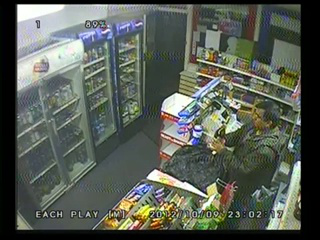

In [35]:
data[1]

###**Model Training and Testing**

In [36]:
X_train,X_test, y_train, y_test = train_test_split(img_array,lables_ohe,test_size=0.2)

In [37]:
len(X_train)

7971

In [38]:
len(X_train)
len(X_test)
len(y_test)
len(y_train)

7971

In [39]:
len(y_train)

7971

In [40]:
X_train=np.array(X_train)
X_test=np.array(X_test)

In [41]:
X_train = X_train.reshape(X_train.shape[0], 240, 320, 3)
X_test = X_test.reshape(X_test.shape[0], 240, 320, 3)

In [42]:
X_test[146].shape

(240, 320, 3)

In [43]:
y_test=np.array(y_test)
y_test = y_test.astype('uint8')
y_train=np.array(y_train)
y_train = y_train.astype('uint8')

In [54]:
y_train

array([2, 5, 3, ..., 2, 3, 6], dtype=uint8)

In [45]:
y_test.shape

(1993,)

In [46]:
y_train.shape

(7971,)

In [47]:

X_train = X_train / 255.0
X_test = X_test / 255.0

In [48]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
inputshape= (240, 320, 3)   

In [49]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=inputshape),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(11, activation='softmax')
])

In [50]:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
cnn.fit(X_train, y_train, epochs=3)

Epoch 1/3
250/250 [==============================] - 111s 442ms/step - loss: 0.7401 - accuracy: 0.8148
Epoch 2/3
250/250 [==============================] - 111s 446ms/step - loss: 0.0773 - accuracy: 0.9877
Epoch 3/3
250/250 [==============================] - 110s 440ms/step - loss: 0.0374 - accuracy: 0.9917


In [52]:
cnn.evaluate(X_test,y_test)

63/63 [==============================] - 4s 68ms/step - loss: 0.0984 - accuracy: 0.9804


[0.09844344109296799, 0.9804314970970154]

In [53]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       145
           1       0.94      0.95      0.94        93
           2       0.97      0.98      0.98       345
           3       0.97      0.99      0.98       272
           4       0.96      0.97      0.97       169
           5       0.96      0.94      0.95       188
           6       1.00      0.97      0.99       150
           7       1.00      0.99      1.00       313
           8       1.00      1.00      1.00       123
          10       1.00      0.99      0.99       195

    accuracy                           0.98      1993
   macro avg       0.98      0.98      0.98      1993
weighted avg       0.98      0.98      0.98      1993



###**Live Video**

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io
import html
import time
from PIL import ImageFont, ImageDraw, Image
from google.colab.patches import cv2_imshow

In [ ]:
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 320, 240);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 320; //video.videoWidth;
      captureCanvas.height = 240; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

def getlabel():
  a=cnn.predict(img)
  return a.argmax() 

In [ ]:
video_stream()
# label for video
label_html = 'Capturing...'
#label_html = '\'%s\''% classes[getlabel()]
# initialze bounding box to empty
bbox = ''
count = 0
name="Normal" 
while True:
    #label_html = '\'%s\''% classes[getlabel()]
    js_reply = video_frame(name, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    img=img.reshape(1,240,320,3)
    name=(classes[getlabel()])
    img=img.reshape(240,320,3)
    
    # create transparent overlay for bounding box
    bbox_array = np.zeros([240,320,4], dtype=np.uint8)

    # grayscale image for face detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # get face region coordinates
    faces = face_cascade.detectMultiScale(gray)
    # get face bounding box for overlay
    for (x,y,w,h) in faces:
      if name=='Normal':
        bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(0,255,0),2)
      else :
        bbox_array = cv2.rectangle(bbox_array,(x,y),(x+w,y+h),(255,0,0),2)  
     
    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


      
          

<IPython.core.display.Javascript object>

### **Offline**

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   

In [ ]:
predicted_images_path=[]
Path_name='/content/try3/videoplayback.mp4'
vidcap = cv2.VideoCapture(Path_name)
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()

    if hasFrames:
        image = cv2.resize(image,(320,240))
        image= image.reshape(1,240,320,3)
        a=cnn.predict(image)
        value=a.argmax()
        image= image.reshape(240,320,3)
        if classes[value]=="Shoplifting":
            image = cv2.putText(image,classes[value] , org, font, fontScale, (0, 0, 255), thickness, cv2.LINE_AA) 
        else:
            image = cv2.putText(image,classes[value] , org, font, fontScale, (0, 255, 0), thickness, cv2.LINE_AA)
        #print("Normal")    
        plt.imshow(image)
        plt.show()
        s=Path_name+''+str(count)+".jpg"  
        cv2.imwrite(s,image)
        predicted_images_path.append(s)
        #cv2.imwrite(str(count)+".jpg",image)    
    return hasFrames
    
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
  #if count<50:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)
  #else:
   # break  

In [ ]:
cd try

In [ ]:

import cv2
import numpy as np
import glob
 
img_array = []
for filename in range(len(predicted_images_path)):
    img = cv2.imread(predicted_images_path[filename])
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project3.avi',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [ ]:
!ffmpeg -i project3.avi output3.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/try/output1.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
      <h1>ABC</h1>
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/try/output2.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
      <h1>ABC</h1>
</video>
""" % data_url)

In [ ]:
from IPython.display import HTML
from base64 import b64encode
mp4 = open('/content/try/output3.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
      <h1>ABC</h1>
</video>
""" % data_url)

In [ ]:
!rm -rf '/content/try1'